# **Market Value Prediction**

#### importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('bundesliga_player.csv', index_col = [0])
df.head()

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,Sven Ulreich,NaN,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,Johannes Schenk,NaN,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,Matthijs de Ligt,NaN,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 515 entries, 0 to 514
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              515 non-null    object 
 1   full_name         229 non-null    object 
 2   age               515 non-null    int64  
 3   height            515 non-null    float64
 4   nationality       515 non-null    object 
 5   place_of_birth    510 non-null    object 
 6   price             510 non-null    float64
 7   max_price         510 non-null    float64
 8   position          515 non-null    object 
 9   shirt_nr          515 non-null    int64  
 10  foot              506 non-null    object 
 11  club              515 non-null    object 
 12  contract_expires  481 non-null    object 
 13  joined_club       515 non-null    object 
 14  player_agent      488 non-null    object 
 15  outfitter         193 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory u

In [4]:
df.isnull().sum()

name                  0
full_name           286
age                   0
height                0
nationality           0
place_of_birth        5
price                 5
max_price             5
position              0
shirt_nr              0
foot                  9
club                  0
contract_expires     34
joined_club           0
player_agent         27
outfitter           322
dtype: int64

In [5]:
def column_summary(data):
    col = []
    dtype = []
    unique = []
    n_unique = []
    nulls = []
    duplicated = []

    for column in data.columns:
        col.append(column)
        dtype.append(data[column].dtype)
        unique.append(data[column].unique())
        n_unique.append(data[column].nunique())
        nulls.append(data[column].isnull().sum())
        duplicated.append(data[column].duplicated().sum())

    return pd.DataFrame({'Column': col, 'Data Type': dtype,
                         'Unique Values': unique, 'Unique_Num': n_unique,
                         'Null Values': nulls, 'Duplicated Values': duplicated})


In [6]:
column_summary(df)


,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,name,object,"[Manuel Neuer, Yann Sommer, Sven Ulreich, Joha...",515,0,0
1,full_name,object,"[Manuel Peter Neuer, nan, Dayotchanculle Oswal...",229,286,285
2,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,492
3,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,484
4,nationality,object,"[Germany, Switzerland, Netherlands, France Gu...",147,0,368
5,place_of_birth,object,"[Gelsenkirchen, Morges, Schorndorf, Schweinfur...",357,5,157
6,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,5,445
7,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,5,435
8,position,object,"[Goalkeeper, Defender - Centre-Back, Defender ...",13,0,502
9,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,466


this column named ['Name','Full_name'] don't necessarily to kept in our data
so I am going to drop them

In [7]:
df1=df.drop(['name','full_name'], axis=1)
df1.head()

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma
2,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,right,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas
3,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,NaN,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN
4,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,right,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas


<BarContainer object of 23 artists>

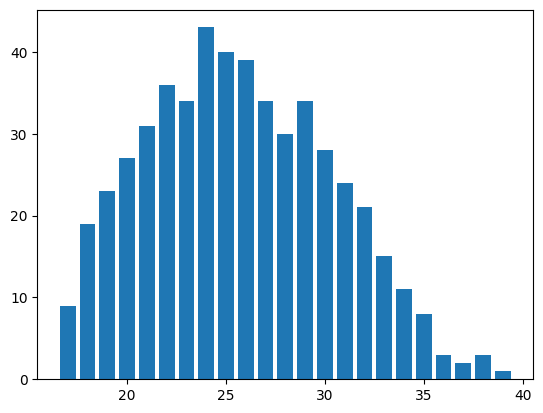

In [8]:
age_counts=df1['age'].value_counts()
plt.bar(age_counts.index,age_counts.values)

Text(0.5, 1.0, 'Price per Age')

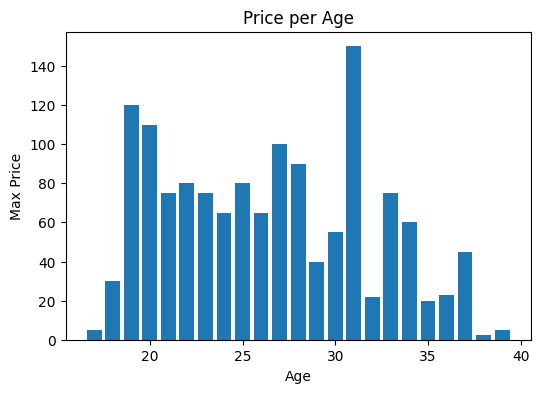

In [9]:
plt.figure(figsize=(6,4))
plt.bar(df1['age'],df1['max_price'])
plt.xlabel('Age')
plt.ylabel('Max Price')
plt.title('Price per Age')

In [10]:
numeric_columns = df1.select_dtypes(include=['object']).columns
numeric_columns

Index(['nationality', 'place_of_birth', 'position', 'foot', 'club',
       'contract_expires', 'joined_club', 'player_agent', 'outfitter'],
      dtype='object')

In [11]:
column_summary(df1)

,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,492
1,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,484
2,nationality,object,"[Germany, Switzerland, Netherlands, France Gu...",147,0,368
3,place_of_birth,object,"[Gelsenkirchen, Morges, Schorndorf, Schweinfur...",357,5,157
4,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,5,445
5,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,5,435
6,position,object,"[Goalkeeper, Defender - Centre-Back, Defender ...",13,0,502
7,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,466
8,foot,object,"[right, nan, left, both]",3,9,511
9,club,object,"[Bayern Munich, Bor. Dortmund, B. Dortmund II,...",28,0,487


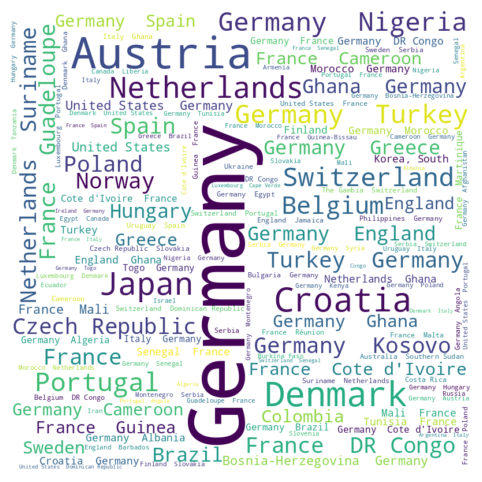

In [12]:
from wordcloud import WordCloud

nationality_counts = df['nationality'].value_counts()
wordcloud =WordCloud(width=800,height=800,background_color='White').generate_from_frequencies(nationality_counts)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

foot


In [13]:
df1['foot'].value_counts()

right    354
left     118
both      34
Name: foot, dtype: int64

In [14]:
encoded_foot = pd.get_dummies(df1['foot'], prefix='foot')

df1 = pd.concat([df1, encoded_foot], axis=1)
df1.drop(['foot'],axis=1, inplace=True)

In [15]:
df1.head()

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,club,contract_expires,joined_club,player_agent,outfitter,foot_both,foot_left,foot_right
0,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas,0,0,1
1,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma,0,0,1
2,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,Bayern Munich,2024-06-30,2021-07-01,BMS Sportconsulting ...,adidas,0,0,1
3,20,1.91,Germany,Schweinfurt,0.3,0.3,Goalkeeper,35,Bayern Munich,2024-06-30,2022-07-01,11WINS,NaN,0,0,0
4,23,1.89,Netherlands,Leiderdorp,75.0,75.0,Defender - Centre-Back,4,Bayern Munich,2027-06-30,2022-07-19,Rafaela Pimenta,adidas,0,0,1


contract_years

In [16]:
df2=df1.copy()
from datetime import datetime


In [17]:
# Convert "contract_expires" column to datetime format
df2['contract_expires'] = pd.to_datetime(df2['contract_expires'])

# Calculate remaining contract years
current_year = datetime.now().year
df2['contract_years'] = (df2['contract_expires'].dt.year - current_year)

# Remove the original "contract_expires" column
df2.drop(['contract_expires'], axis=1, inplace=True)


In [18]:
# Replace non-finite values with a default value
default_contract_years = 0  # Set the default value as desired
df2['contract_years'].fillna(default_contract_years, inplace=True)

# Convert "contract_years" column to integer data type
df2['contract_years'] = df2['contract_years'].astype(int)
df2['contract_years'].value_counts()

0    134
2    125
1    119
3     93
4     43
5      1
Name: contract_years, dtype: int64

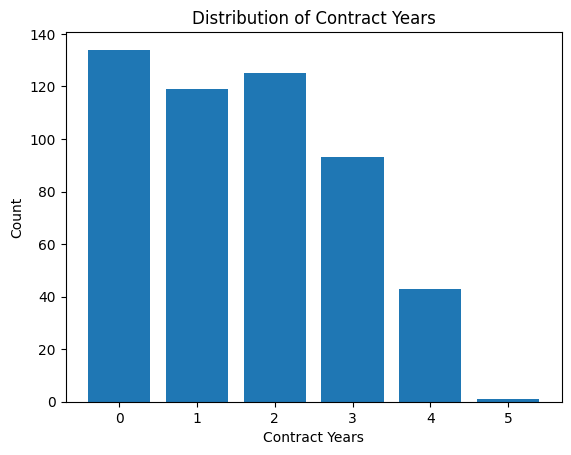

In [19]:
contracts = df2['contract_years'].value_counts()
plt.bar(x=contracts.index, height=contracts.values)
plt.xlabel('Contract Years')
plt.ylabel('Count')
plt.title('Distribution of Contract Years')
plt.show()

In [20]:
df2.head(3)

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,club,joined_club,player_agent,outfitter,foot_both,foot_left,foot_right,contract_years
0,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,Bayern Munich,2011-07-01,PRO Profil GmbH,adidas,0,0,1,1
1,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,Bayern Munich,2023-01-19,Relatives,Puma,0,0,1,2
2,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,Bayern Munich,2021-07-01,BMS Sportconsulting ...,adidas,0,0,1,1


joined_club

In [21]:
df2['joined_club'].value_counts()

2022-07-01    100
2021-07-01     51
2019-07-01     31
2020-07-01     20
2018-07-01     13
             ... 
2015-01-21      1
2020-08-25      1
2021-08-31      1
2023-01-25      1
2019-07-05      1
Name: joined_club, Length: 194, dtype: int64

In [22]:
df2['joined_club'] = pd.to_datetime(df2['joined_club'])

# Calculate the difference in years from the current date
current_date = pd.to_datetime('today')
df2['joined_years'] = (current_date - df2['joined_club']).astype('<m8[Y]')

# Drop the original "joined_club" column
df2.drop('joined_club', axis=1, inplace=True)

In [23]:
df2['joined_from'] = df2['joined_years'].astype(int)

In [24]:
print("Number of the year player was in the team is: ", df2['joined_years'].value_counts())

Number of the year player was in the team is:  1.0     164
2.0      88
0.0      84
3.0      48
4.0      44
5.0      19
7.0      18
8.0      15
6.0       9
9.0       9
11.0      5
12.0      4
10.0      3
13.0      3
14.0      2
Name: joined_years, dtype: int64


In [25]:
df.head(2)

,name,full_name,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,foot,club,contract_expires,joined_club,player_agent,outfitter
0,Manuel Neuer,Manuel Peter Neuer,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,right,Bayern Munich,2024-06-30,2011-07-01,PRO Profil GmbH,adidas
1,Yann Sommer,NaN,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,right,Bayern Munich,2025-06-30,2023-01-19,Relatives,Puma


In [26]:
df2.head(3)

,age,height,nationality,place_of_birth,price,max_price,position,shirt_nr,club,player_agent,outfitter,foot_both,foot_left,foot_right,contract_years,joined_years,joined_from
0,37,1.93,Germany,Gelsenkirchen,7.0,45.0,Goalkeeper,1,Bayern Munich,PRO Profil GmbH,adidas,0,0,1,1,12.0,12
1,34,1.83,Switzerland,Morges,5.0,13.0,Goalkeeper,27,Bayern Munich,Relatives,Puma,0,0,1,2,0.0,0
2,34,1.92,Germany,Schorndorf,0.9,6.0,Goalkeeper,26,Bayern Munich,BMS Sportconsulting ...,adidas,0,0,1,1,2.0,2


**player_agent**

In [27]:
df3=df2.copy()

In [28]:
column_summary(df3)

,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,492
1,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,484
2,nationality,object,"[Germany, Switzerland, Netherlands, France Gu...",147,0,368
3,place_of_birth,object,"[Gelsenkirchen, Morges, Schorndorf, Schweinfur...",357,5,157
4,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,5,445
5,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,5,435
6,position,object,"[Goalkeeper, Defender - Centre-Back, Defender ...",13,0,502
7,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,466
8,club,object,"[Bayern Munich, Bor. Dortmund, B. Dortmund II,...",28,0,487
9,player_agent,object,"[PRO Profil GmbH, Relatives, BMS Sportconsulti...",185,27,329


# now we need to fill na in player agent and outfiter witn none
## cause i can't replace with mode if i did the pattern will learn from the false data so i ll give them 'none'


In [29]:
df3['player_agent']=df3['player_agent'].fillna('none')
df3['outfitter']=df3['outfitter'].fillna('none')


In [30]:
column_summary(df3)

,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,492
1,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,484
2,nationality,object,"[Germany, Switzerland, Netherlands, France Gu...",147,0,368
3,place_of_birth,object,"[Gelsenkirchen, Morges, Schorndorf, Schweinfur...",357,5,157
4,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,5,445
5,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,5,435
6,position,object,"[Goalkeeper, Defender - Centre-Back, Defender ...",13,0,502
7,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,466
8,club,object,"[Bayern Munich, Bor. Dortmund, B. Dortmund II,...",28,0,487
9,player_agent,object,"[PRO Profil GmbH, Relatives, BMS Sportconsulti...",186,0,329


### now we have no null values
## next step is label encodeing for every object columns


In [31]:
obj_col=[]
for column in df3.columns:
    if df3[column].dtype == 'object':
      obj_col.append(column)

obj_col

['nationality',
 'place_of_birth',
 'position',
 'club',
 'player_agent',
 'outfitter']

In [32]:
from sklearn.preprocessing import LabelEncoder


for col in obj_col:
  label=LabelEncoder()
  df3[col]=label.fit_transform(df3[col].astype(str))

In [33]:
obj_col=[]
for column in df3.columns:
    if df3[column].dtype == 'object':
      obj_col.append(column)

obj_col

[]

no we have all nummeric col


In [34]:
column_summary(df3)


,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,492
1,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,484
2,nationality,int64,"[55, 130, 107, 45, 54, 15, 115, 39, 106, 22, 1...",147,0,368
3,place_of_birth,int64,"[114, 217, 278, 279, 172, 355, 203, 61, 11, 33...",358,0,157
4,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,5,445
5,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,5,435
6,position,int64,"[7, 4, 5, 6, 10, 9, 8, 1, 2, 3, 0, 12, 11]",13,0,502
7,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,466
8,club,int64,"[6, 7, 4, 16, 18, 17, 5, 9, 8, 24, 19, 20, 21,...",28,0,487
9,player_agent,int64,"[112, 127, 15, 0, 126, 162, 94, 5, 132, 56, 30...",186,0,329


### make scalling for this col =['nationality' , 'place_of_birth' , 'position' ,'club' , 'player_agent' , 'outfitter']

In [35]:
# scalling
over_1000= ['nationality' , 'place_of_birth','player_agent']
over_100= ['position','club','outfitter']
df3[over_1000]=df3[over_1000]/1000
df3[over_100]=df3[over_100]/100

In [36]:
# delete null in price and maxprice

df3.dropna(inplace=True)
column_summary(df3)

,Column,Data Type,Unique Values,Unique_Num,Null Values,Duplicated Values
0,age,int64,"[37, 34, 20, 23, 24, 27, 22, 33, 28, 25, 31, 1...",23,0,487
1,height,float64,"[1.93, 1.83, 1.92, 1.91, 1.89, 1.86, 1.84, 1.8...",31,0,479
2,nationality,float64,"[0.055, 0.13, 0.107, 0.045, 0.054, 0.015, 0.11...",147,0,363
3,place_of_birth,float64,"[0.114, 0.217, 0.278, 0.279, 0.172, 0.355, 0.2...",356,0,154
4,price,float64,"[7.0, 5.0, 0.9, 0.3, 75.0, 60.0, 50.0, 70.0, 6...",69,0,441
5,max_price,float64,"[45.0, 13.0, 6.0, 0.3, 75.0, 60.0, 70.0, 80.0,...",79,0,431
6,position,float64,"[0.07, 0.04, 0.05, 0.06, 0.1, 0.09, 0.08, 0.01...",13,0,497
7,shirt_nr,int64,"[1, 27, 26, 35, 4, 2, 21, 19, 23, 22, 5, 40, 4...",49,0,461
8,club,float64,"[0.06, 0.07, 0.04, 0.16, 0.18, 0.17, 0.05, 0.0...",26,0,484
9,player_agent,float64,"[0.112, 0.127, 0.015, 0.0, 0.126, 0.162, 0.094...",183,0,327


1. Spliting the data
2. Building Machine Learning model
3. choice the best model


In [37]:
# import function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

In [38]:
features=df3.drop(['price'],axis=1)
target=df3['price']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=.3,random_state=10)
X_train,X_val,y_train,y_val=train_test_split(X_train,y_train,test_size=.25, random_state=10)

### 1/model Multiple Linear regression

## grid search = best params is :  {'fit_intercept': False, 'positive': False} best score is :  0.5645471127846997

In [41]:
linear_model = LinearRegression(fit_intercept=False ,positive=False )

# Fit the model to the training data
linear_model.fit(X_train, y_train)

# Make predictions on the validation data
lr_pred = linear_model.predict(X_val)


In [66]:
from sklearn.metrics import mean_absolute_error

# Evaluate the model on the validation data
lr_pred_val = linear_model.predict(X_val)
mse_val_lr = mean_squared_error(y_val, lr_pred_val)
r2_val_lr = r2_score(y_val, lr_pred_val)
mae_val_lr = mean_absolute_error(y_val, lr_pred_val)
print("Validation Set:")
print("Mean Squared Error:", mse_val_lr)
print("R-squared:", r2_val_lr)
print("Mean Absolute Error:", mae_val_lr)

# Evaluate the model on the test data
lr_pred_test = linear_model.predict(X_test)
mse_test_lr = mean_squared_error(y_test, lr_pred_test)
r2_test_lr = r2_score(y_test, lr_pred_test)
mae_test_lr = mean_absolute_error(y_test, lr_pred_test)
print("Test Set:")
print("Mean Squared Error:", mse_test_lr)
print("R-squared:", r2_test_lr)
print("Mean Absolute Error:", mae_test_lr)


Validation Set:
Mean Squared Error: 47.811179591889086
R-squared: 0.7511016407393993
Mean Absolute Error: 4.483391573839165
Test Set:
Mean Squared Error: 39.614571221137034
R-squared: 0.8296240458762871
Mean Absolute Error: 4.054855066430366


## Decision tree


### grid search = Best Parameters: {'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2} Best Score: 0.6802904143718289

In [44]:
# create the model
tree_model = DecisionTreeRegressor(max_depth=5, min_samples_leaf=4, min_samples_split=2 )

# fit to the training data
tree_model.fit(X_train, y_train)

# Make predictions
tree_pred_val = tree_model.predict(X_val)


In [45]:
# Evaluate the model on the validation data
mse_val = mean_squared_error(y_val, tree_pred_val)
r2_val = r2_score(y_val, tree_pred_val)
mae_val = mean_absolute_error(y_val, tree_pred_val)
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("R-squared:", r2_val)
print("Mean Absolute Error:", mae_val)


Validation Set:
Mean Squared Error: 97.08452805926348
R-squared: 0.49459143343035716
Mean Absolute Error: 3.894747008448452


In [65]:
# Make predictions on the test data
tree_pred_test = tree_model.predict(X_test)

# Evaluate the model on the test data
mse_test_dt = mean_squared_error(y_test, tree_pred_test)
r2_test_dt = r2_score(y_test, tree_pred_test)
mae_test_dt = mean_absolute_error(y_test, tree_pred_test)
print("Test Set:")
print("Mean Squared Error:", mse_test_dt)
print("R-squared:", r2_test_dt)
print("Mean Absolute Error:", mae_test_dt)


Test Set:
Mean Squared Error: 54.713833232163395
R-squared: 0.7646845276032755
Mean Absolute Error: 3.2082895994361467


## Random Foresst Regressior

### grid search =Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200} Best Score: 0.7755583053551423


In [50]:
# create the model
rfr_model = RandomForestRegressor(n_estimators=200,max_depth=None, min_samples_leaf=1, min_samples_split=2 )

# fit to the training data
rfr_model.fit(X_train, y_train)

# Make predictions
tree_pred_val =rfr_model.predict(X_val)


In [51]:
# Evaluate the model on the validation data
mse_val = mean_squared_error(y_val, tree_pred_val)
r2_val = r2_score(y_val, tree_pred_val)
mae_val = mean_absolute_error(y_val, tree_pred_val)
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("R-squared:", r2_val)
print("Mean Absolute Error:", mae_val)


Validation Set:
Mean Squared Error: 31.72883440711805
R-squared: 0.8348240956907346
Mean Absolute Error: 2.754529166666667


In [64]:
# Make predictions on the test data
tree_pred_test = tree_model.predict(X_test)

# Evaluate the model on the test data
mse_test_rf = mean_squared_error(y_test, tree_pred_test)
r2_test_rf = r2_score(y_test, tree_pred_test)
mae_test_rf = mean_absolute_error(y_test, tree_pred_test)
print("Test Set:")
print("Mean Squared Error:", mse_test_rf)
print("R-squared:", r2_test_rf)
print("Mean Absolute Error:", mae_test_rf)


Test Set:
Mean Squared Error: 54.713833232163395
R-squared: 0.7646845276032755
Mean Absolute Error: 3.2082895994361467


## SVC

### grid search = Best Parameters: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'} Best Score: 0.7132104814813274


In [58]:
from sklearn.svm import SVR
# create the model
svc_model1 = SVR(C=10, epsilon=.5, kernel='rbf' )

# fit to the training data
svc_model1.fit(X_train, y_train)

# Make predictions
tree_pred_val =svc_model1.predict(X_val)


In [56]:
# Evaluate the model on the validation data
mse_val = mean_squared_error(y_val, tree_pred_val)
r2_val = r2_score(y_val, tree_pred_val)
mae_val = mean_absolute_error(y_val, tree_pred_val)
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("R-squared:", r2_val)
print("Mean Absolute Error:", mae_val)


Validation Set:
Mean Squared Error: 39.062824839773334
R-squared: 0.7966443603003425
Mean Absolute Error: 3.2798441444461863


In [67]:
# Make predictions on the test data
tree_pred_test = tree_model.predict(X_test)

# Evaluate the model on the test data
mse_test_sv = mean_squared_error(y_test, tree_pred_test)
r2_test_sv = r2_score(y_test, tree_pred_test)
mae_test_sv = mean_absolute_error(y_test, tree_pred_test)
print("Test Set:")
print("Mean Squared Error:", mse_test_sv)
print("R-squared:", r2_test_sv)
print("Mean Absolute Error:", mae_test_sv)


Test Set:
Mean Squared Error: 54.713833232163395
R-squared: 0.7646845276032755
Mean Absolute Error: 3.2082895994361467


## apply GradientBoostingRegressor

### grid search =Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100} Best Score: 0.7588547272336804

In [60]:
from sklearn.ensemble import GradientBoostingRegressor
# create the model
gbr = GradientBoostingRegressor(learning_rate=0.1, max_depth=3, n_estimators=100 )

# fit to the training data
gbr.fit(X_train, y_train)

# Make predictions
tree_pred_val =gbr.predict(X_val)


In [61]:
# Evaluate the model on the validation data
mse_val = mean_squared_error(y_val, tree_pred_val)
r2_val = r2_score(y_val, tree_pred_val)
mae_val = mean_absolute_error(y_val, tree_pred_val)
print("Validation Set:")
print("Mean Squared Error:", mse_val)
print("R-squared:", r2_val)
print("Mean Absolute Error:", mae_val)


Validation Set:
Mean Squared Error: 46.49033629526101
R-squared: 0.7579777674565671
Mean Absolute Error: 3.175969755647812


In [68]:
# Make predictions on the test data
tree_pred_test = tree_model.predict(X_test)

# Evaluate the model on the test data
mse_test_gb = mean_squared_error(y_test, tree_pred_test)
r2_test_gb = r2_score(y_test, tree_pred_test)
mae_test_gb = mean_absolute_error(y_test, tree_pred_test)
print("Test Set:")
print("Mean Squared Error:", mse_test_gb)
print("R-squared:", r2_test_gb)
print("Mean Absolute Error:", mae_test_gb )


Test Set:
Mean Squared Error: 54.713833232163395
R-squared: 0.7646845276032755
Mean Absolute Error: 3.2082895994361467


In [69]:
# Create a DataFrame for the models and their evaluation metrics

model_dataframe = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVR'],
    'Mean Squared Error': [mse_test_lr, mse_test_dt, mse_test_rf, mse_test_gb, mse_test_sv],
    'R-squared': [r2_test_lr, r2_test_dt, r2_test_rf, r2_test_gb, r2_test_sv],
    'Mean Absolute Error': [mae_test_lr, mae_test_dt, mae_test_rf, mae_test_gb, mae_test_sv]
})

# Sort the DataFrame by R-squared score in descending order
models_df = model_dataframe.sort_values(by='R-squared', ascending=False)



In [70]:
models_df

,Model,Mean Squared Error,R-squared,Mean Absolute Error
0,Linear Regression,39.614571,0.829624,4.054855
1,Decision Tree,54.713833,0.764685,3.208290
2,Random Forest,54.713833,0.764685,3.208290
3,Gradient Boosting,54.713833,0.764685,3.208290
4,SVR,54.713833,0.764685,3.208290


# I found the best model wa Multiple Linear regression with r-squared =0.82